# ARIMA

In this exercise, we are going to work with synthetic data using simple sine wawes. The equation for a sine wave:

y(t)=A∗sin(2∗π∗f∗t+ϕ)

where:

**Y(t)** means the value of the wave at time *t*

**A** means the *amplitude*, or the peak deviation of the function from zero. (Basically, how high or low the wave goes)

**f** means the *ordinary frequency*, or the number of oscillations (cycles) that occur at each second of time. In other words, this is how “wide” or “narrow” the sine wave is.

**$\phi$** means the *phase*, which specifies (in radians) where in its cycle the oscillation is at t = 0. In other words, this refers to what point in the wave we start at, at time point zero.

# Equation shape
Our equation will be of the form:
$y=a\cdot\sin(b\cdot t)$


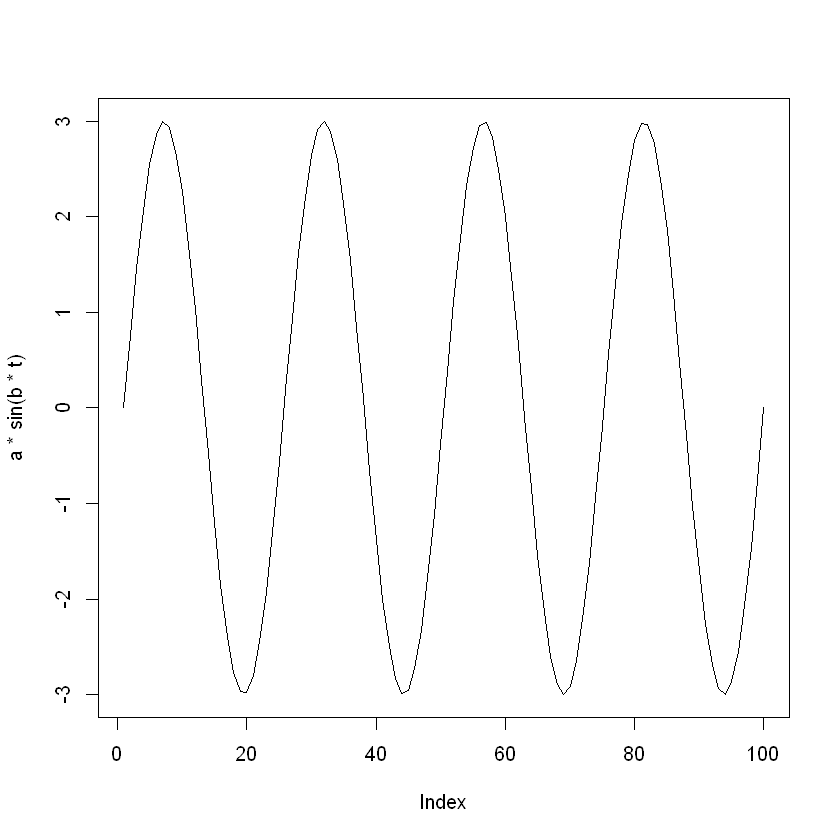

In [3]:

t <- seq(0,4*pi,,100) #sequence of 100 numbers going up by intervals of 4*pi.
a <- 3 # amplitude
b <- 2 # width of each wave

#Here is a perfect, noiseless plot of the sine wave:

plot(a*sin(b*t),type="l")

# Add some noise
We can add this manually with R’s *runif* and *rnorm* functions.

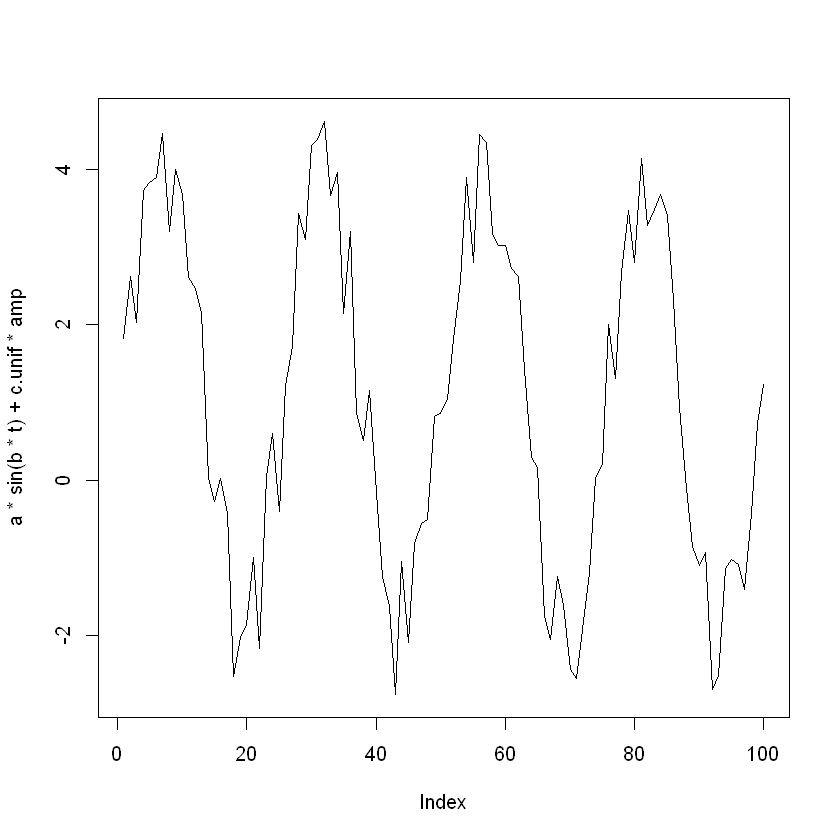

In [4]:
n <- 100 #number of data points

set.seed(42) # set the seed so that random values come out consistently, for the sake of reproducibility of these results

c.unif <- runif(n)  ###here are 100 data points of uniform error
c.norm <- rnorm(n) ### here are 100 data points of  Gaussian/normal error
amp <- 2 ### the amplitude of the noise

plot(a*sin(b*t)+c.unif*amp,type="l") # sine wave with uniform error

# Sine wave Gaussian/normal error

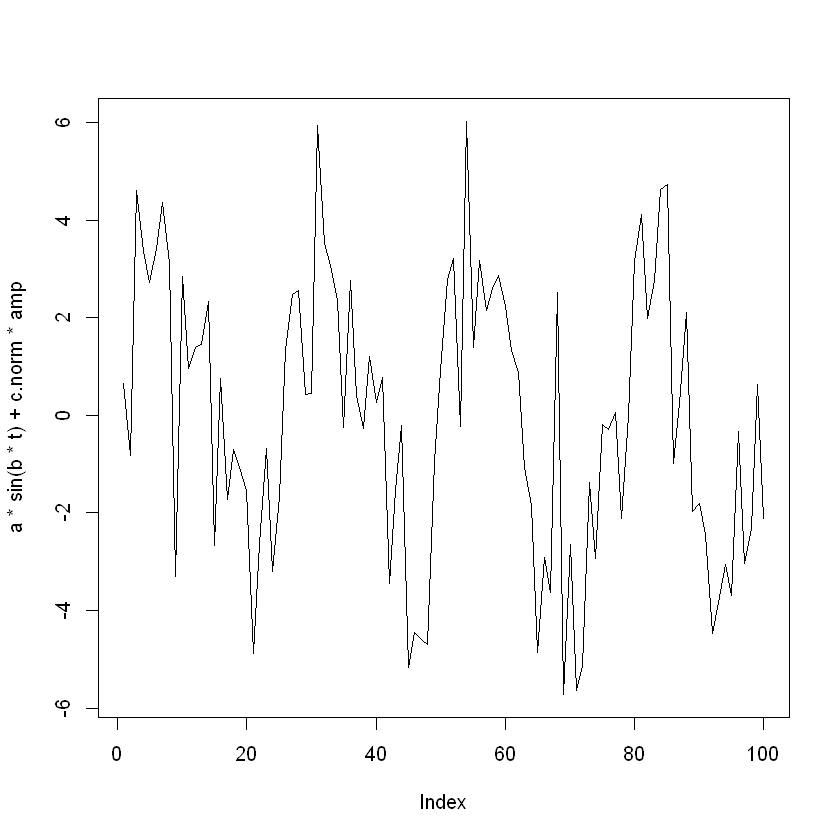

In [5]:
plot(a*sin(b*t)+c.norm*amp,type="l") 

# Noise with jitter
Another, easier way to add noise in R is by using the jitter function. Note that changing the factor variable will determine how much noise is added.

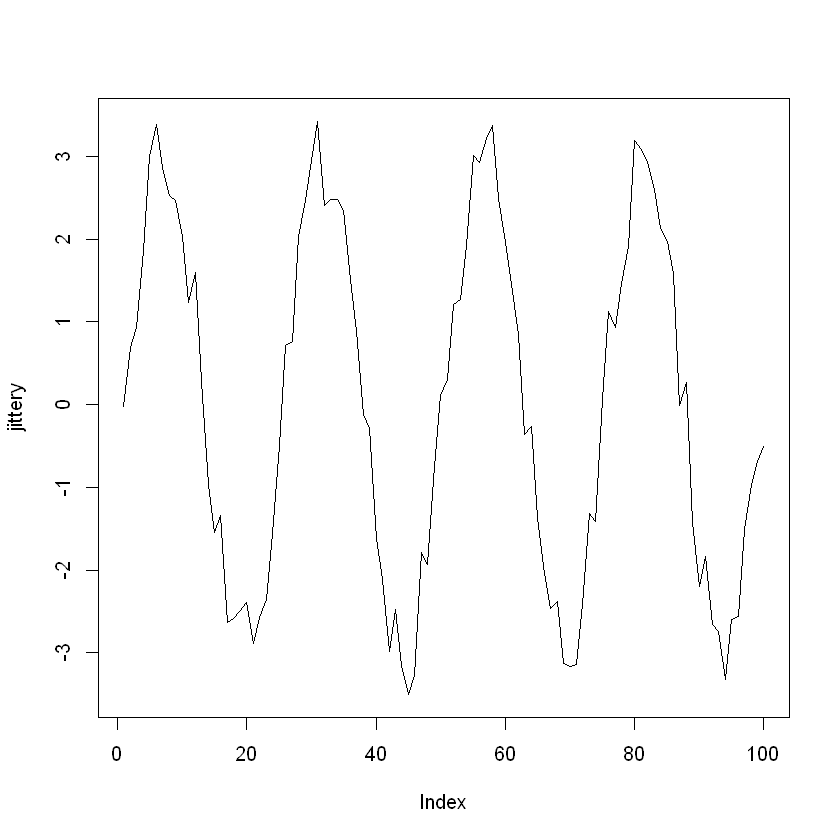

In [6]:
jittery <- jitter(a*sin(b*t), factor=1000)

plot(jittery, type="l")

# Create a more complex timeseries
Create a more complex time series that is made up of two sine waves added together that go up exponentially.

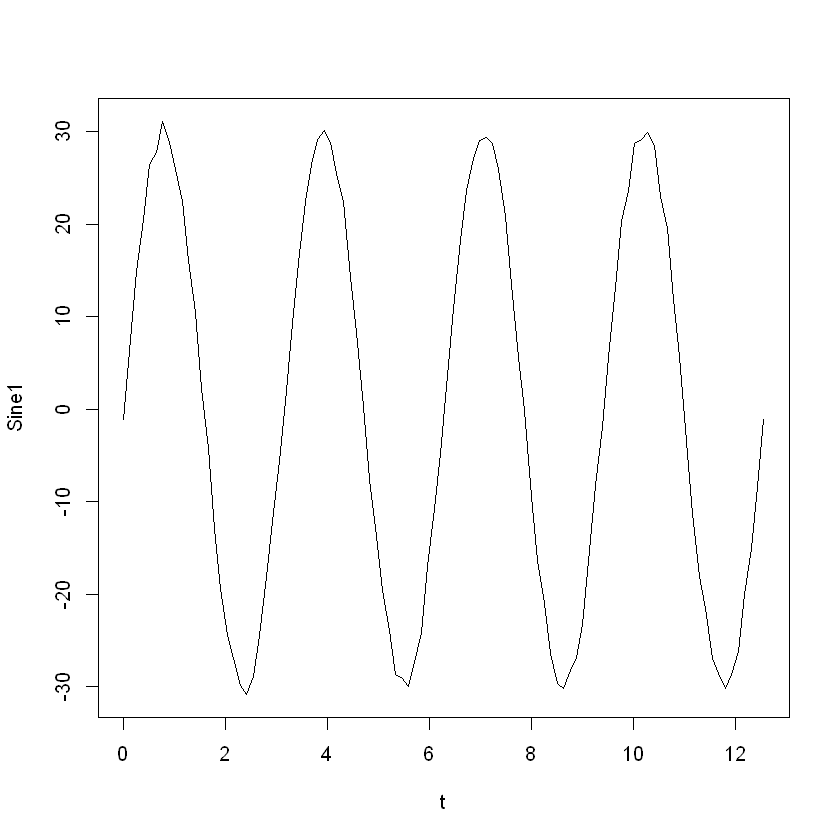

In [7]:
Sine1 <- jitter(30*sin(2*t), factor=200)
plot(t,Sine1,type="l")

# Second sine wave
Now we’ll make our second sine wave. This one is going to be a little bit different from the first one, though, in that it has a smaller amplitude and a higher frequency. We’ll throw off the phase a bit, to

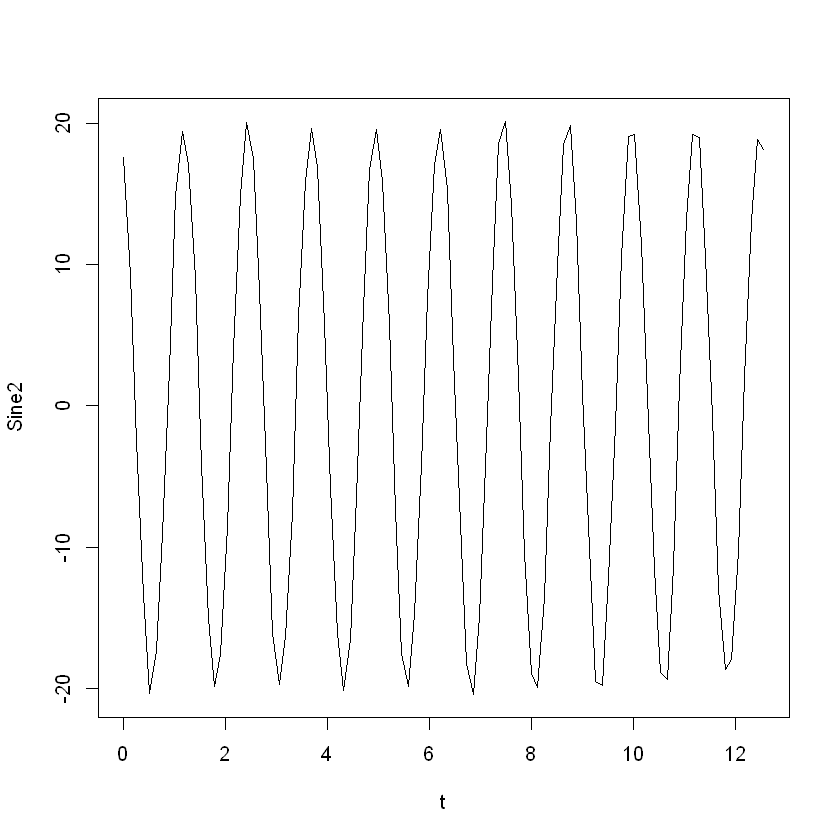

In [8]:
Sine2<-jitter(20*sin(5*t+2), factor=200)

plot(t,Sine2,type="l")

# Now let’s add our two sine waves together:

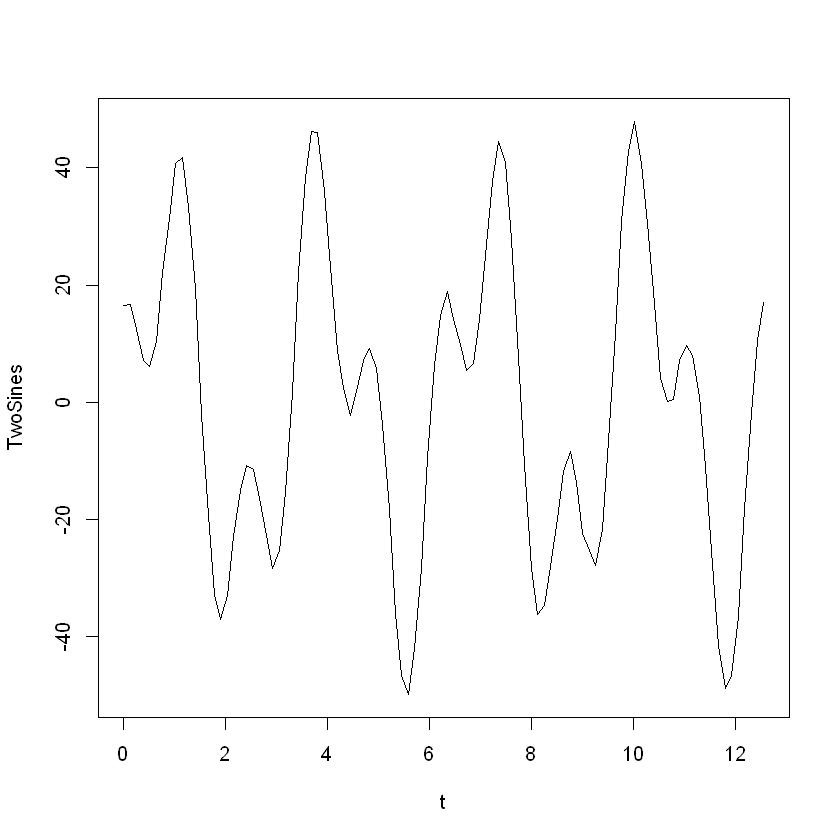

In [9]:
TwoSines<-Sine1+Sine2

plot(t,TwoSines,type="l")

#  Double-sine-wave that goes up exponentially.

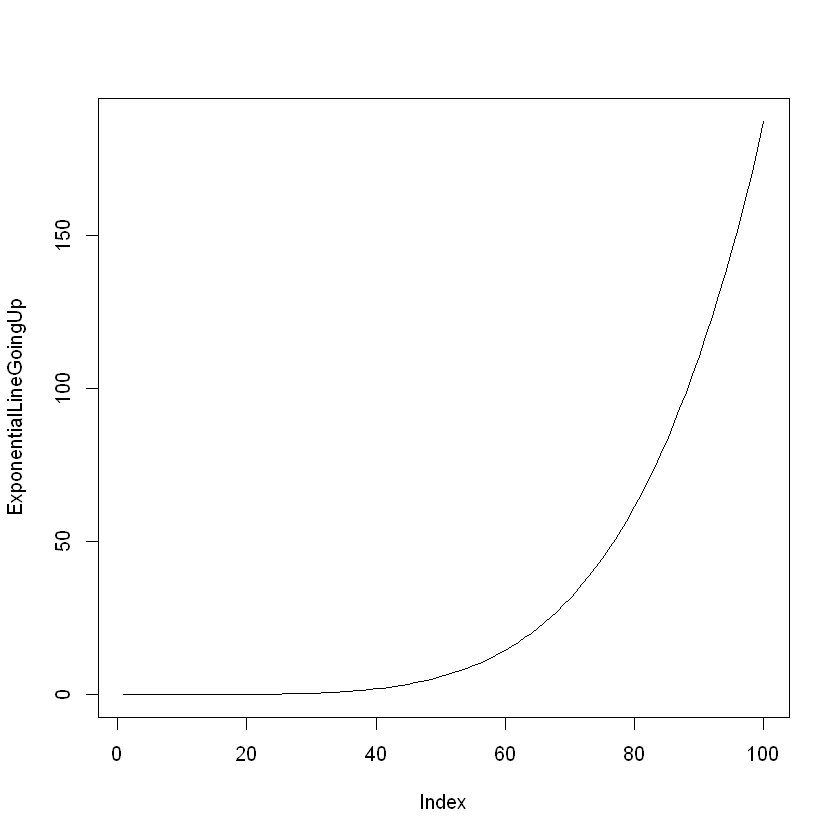

In [10]:
LineGoingUp<-seq(0.5,50,0.5)
ExponentialLineGoingUp<-(3/5000000)*LineGoingUp^5
plot(ExponentialLineGoingUp, type="l") #This is the line that we'll add to our time series to make it go up exponentially

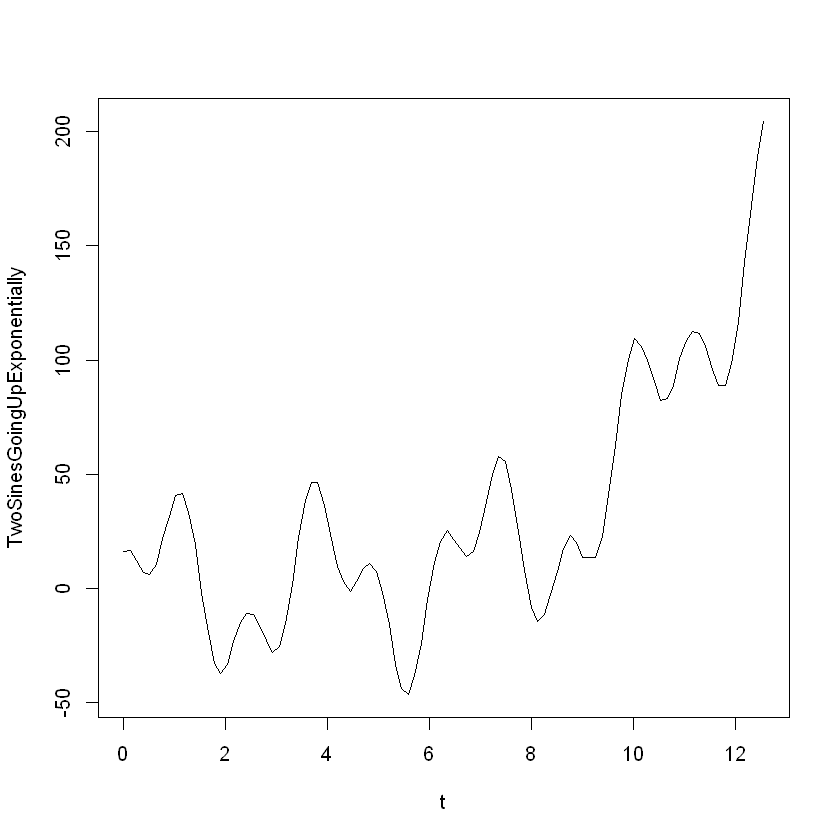

In [11]:
TwoSinesGoingUpExponentially<-TwoSines+ExponentialLineGoingUp
plot(t,TwoSinesGoingUpExponentially,type="l")

# Additive or Multiplicative model?
 If the size of seasonal fluctuations and random fluctiations increases in the time series as time goes on, then this indicates that an additive model is NOT appropriate.

For instance, check out the following line:

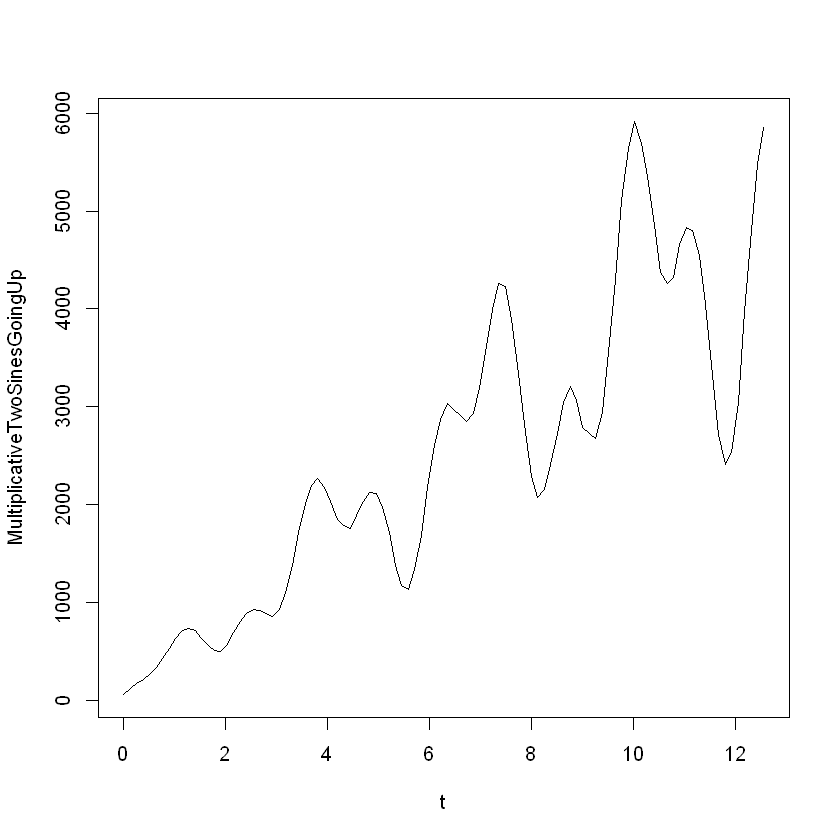

In [12]:
MultiplicativeTwoSinesGoingUp<-(TwoSines+100)*LineGoingUp
plot(t,MultiplicativeTwoSinesGoingUp,type="l")

The seasonal component at the beginning of the series is smaller than the seasonal component later in the series.

To account for this, you’d need to log-transform the data as follows:

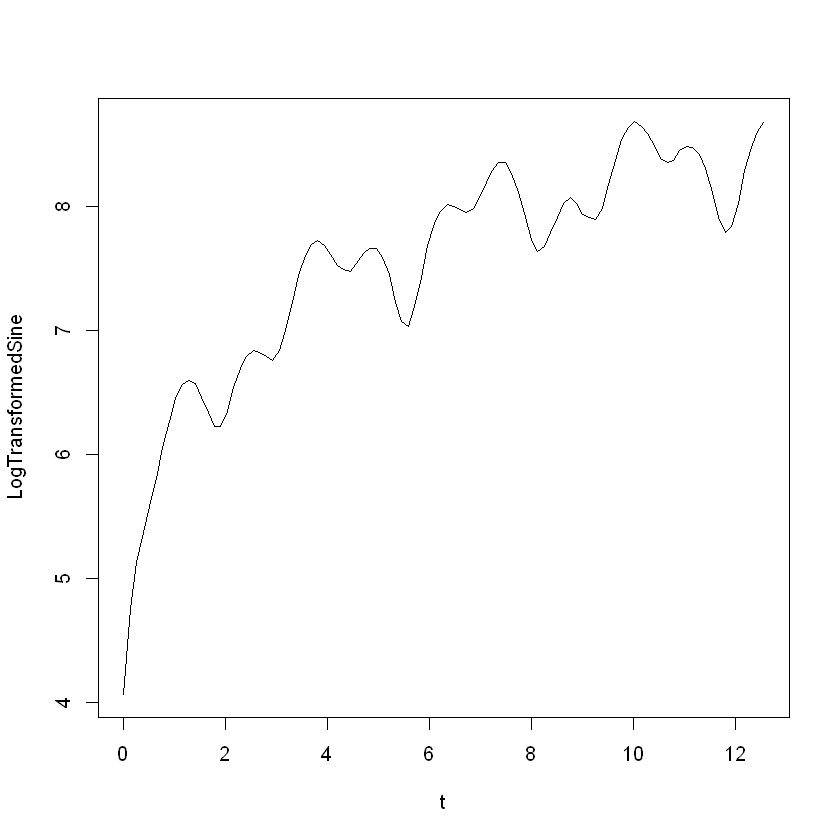

In [14]:
LogTransformedSine<-log(MultiplicativeTwoSinesGoingUp)
plot(t,LogTransformedSine,type="l")

That way, these data could be described by an additive model rather than a multiplicative model.

# Determining stationarity
So, the first thing to do is to determine if our time series is stationary (i.e., if the mean is generally constant throughout the time series, as opposed to going up or down over time).

First, we’ll do this with a visual inspection. Let’s call up our previous plot.

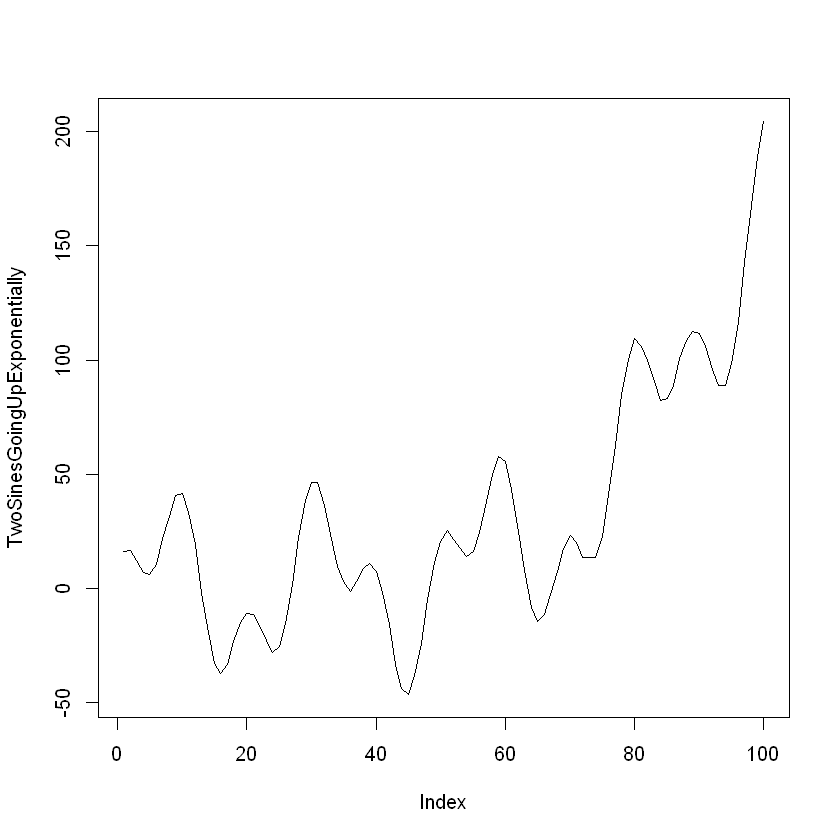

In [15]:
plot(TwoSinesGoingUpExponentially, type="l")

this doesn’t look stationary at all, as the mean tends to go up over time. We can do one better than a visual inspection, however, and use a formal test to determine stationarity (or lack thereof) in a more empirical way

# Determining stationarity with an augmented Dickey-Fuller test
For this, we can use the augmented Dickey-Fuller (ADF) test, which tests the null hypothesis 
that the series is non-stationary. This is included in the “tseries” package.

Without going into too much detail, the ADF test determines whether the change in Y can be explained by a lagged value (e.g., a value at a previous time point Y [t-1] ) and by a linear trend. If there is a linear trend but the lagged value cannot explain the change in Y over time, then our data will be deemed non-stationary.

In [16]:
install.packages("tseries") #if needed


Installazione pacchetto in 'C:/Users/Enric/AppData/Local/R/win-library/4.2'
(perché 'lib' non è specificato)



pacchetto 'tseries' aperto con successo con controllo somme MD5

I pacchetti binari scaricati sono in
	C:\Users\Enric\AppData\Local\Temp\RtmpsXhULF\downloaded_packages


In [17]:
library("tseries")
adf.test(TwoSinesGoingUpExponentially, alternative = "stationary")

Warning message:
"il pacchetto 'tseries' è stato creato con R versione 4.2.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Augmented Dickey-Fuller Test

data:  TwoSinesGoingUpExponentially
Dickey-Fuller = -0.6673, Lag order = 4, p-value = 0.9707
alternative hypothesis: stationary


# Finding the d value - a.k.a, differencing the data to achieve stationarity
Given that we have non-stationary data, we will need to “difference” the data until we obtain a stationary time series. We can do this with the “diff” function in R.

This basically takes a vector and, for each value in the vector, subtracts the previous value. So if you have:

5 8 1 6 4

… then the “differenced” vector would be:

3 -7 5 -2

Of course, since the first value in the original vector did NOT have a previous number, this one doesn’t get a corresponding value in the new, differenced vector. So, the differenced vector will have one less data point.

Now, our first step will only take what is known as the “first-order difference – that is, the difference when you only remove the previous Y values only once. In more formal mathematical terms,

$Y_{d_{t}} = Y_{t} − Y_{t−1}$

Basically, for each time point in our data, this gives you the change in value from the previous time point. Here’s how we do this in R:

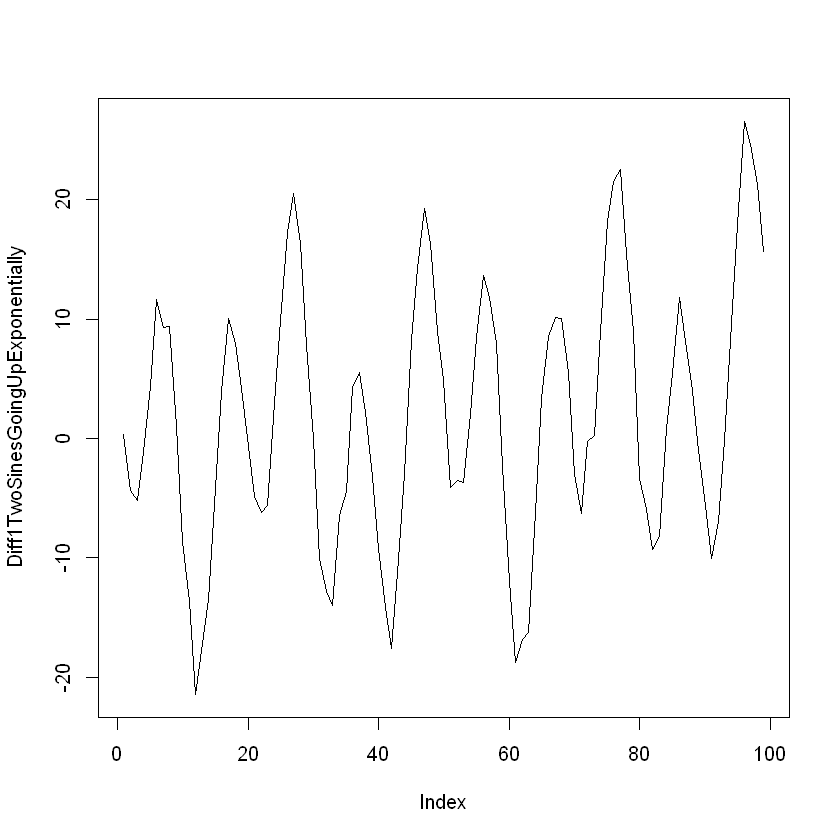

In [18]:
Diff1TwoSinesGoingUpExponentially<-diff(TwoSinesGoingUpExponentially, differences=1)

plot(Diff1TwoSinesGoingUpExponentially, type="l")

#  our data don’t look quite stationary yet! 
See how they seem to go up subtly over time?

Let’s confirm this with an ADF test:

In [19]:
adf.test(Diff1TwoSinesGoingUpExponentially, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  Diff1TwoSinesGoingUpExponentially
Dickey-Fuller = -2.8888, Lag order = 4, p-value = 0.2086
alternative hypothesis: stationary


Anyway, let’s get our second order difference:

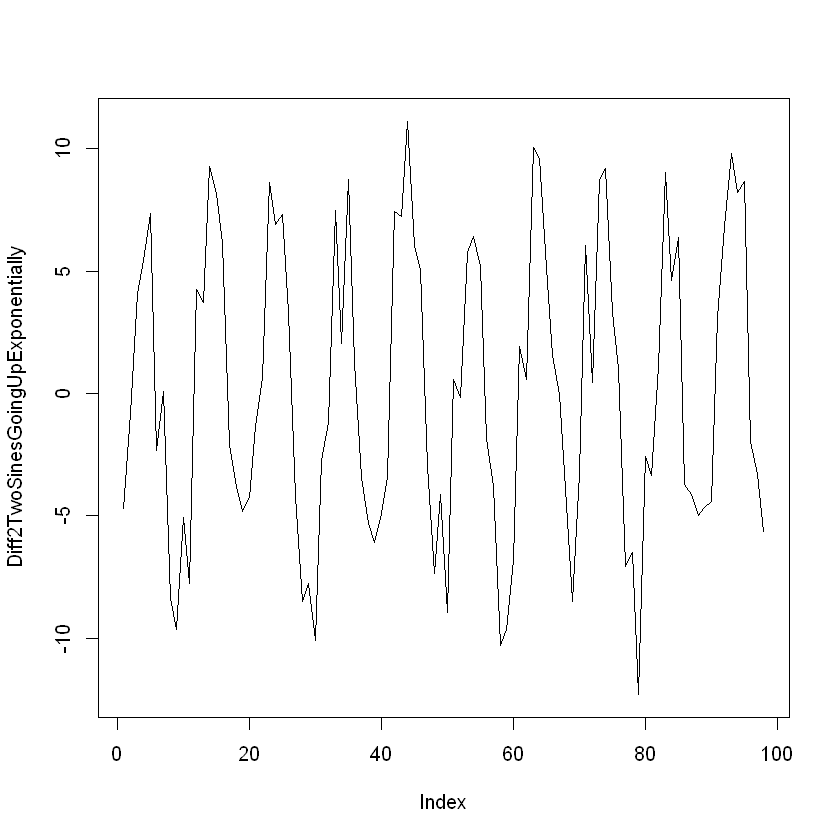

In [20]:
Diff2TwoSinesGoingUpExponentially<-diff(TwoSinesGoingUpExponentially, differences=2)

plot(Diff2TwoSinesGoingUpExponentially, type="l")

In [21]:
adf.test(Diff2TwoSinesGoingUpExponentially, alternative = "stationary")

Warning message in adf.test(Diff2TwoSinesGoingUpExponentially, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Diff2TwoSinesGoingUpExponentially
Dickey-Fuller = -9.9776, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


 p is way below 0.05. Looks like our data is indeed stationary. Given that we had to difference the data twice, the d value for our ARIMA model is 2.

# Using correlograms and partial correlograms to determine our p and q values
If/once you have a stationary time series, the next step is to select the appropriate ARIMA model. This means finding the most appropriate values for p and q in the ARIMA(p,d,q) model.

(Remember: p refers to how many previous/lagged Y values are accounted for for each time point in our model, and q refers to how many previous/lagged error values are accounted for for each time point in our model. )

To do so, you need to examine the “correlogram” and “partial correlogram” of the stationary time series.

A correlogram shows the AUTOCORRELATION FUNCTION. It’s just like a correlation, except that, rather than correlating two completely different variables, it’s correlating a variable at time t and that same variable at time t-k

A partial correlogram is basically the same thing, except that it removes the effect of shorter autocorrelation lags when calculating the correlation at longer lags. To be more precise, the partial correlation at lag k is the autocorrelation between Yt and Yt-k that is NOT accounted for by the autocorrelations from the 1st to the (k-1)st lags.

To plot a correlogram and partial correlogram, we can use the “acf()” and “pacf()” functions in R, respectively. F.Y.I., if you just want the actual values of the autocorrelations and partial autocorrelations without the plot, we can set “plot=FALSE” in the “acf()” and “pacf()” functions.

For the purposes of this demonstration, let’s get the autocorrelations for the original, non-stationary data as well as the once-differenced, stationary data.

Note that you can specify the maximum number of lags to be shown in the plot by specifying a “lag.max” value:

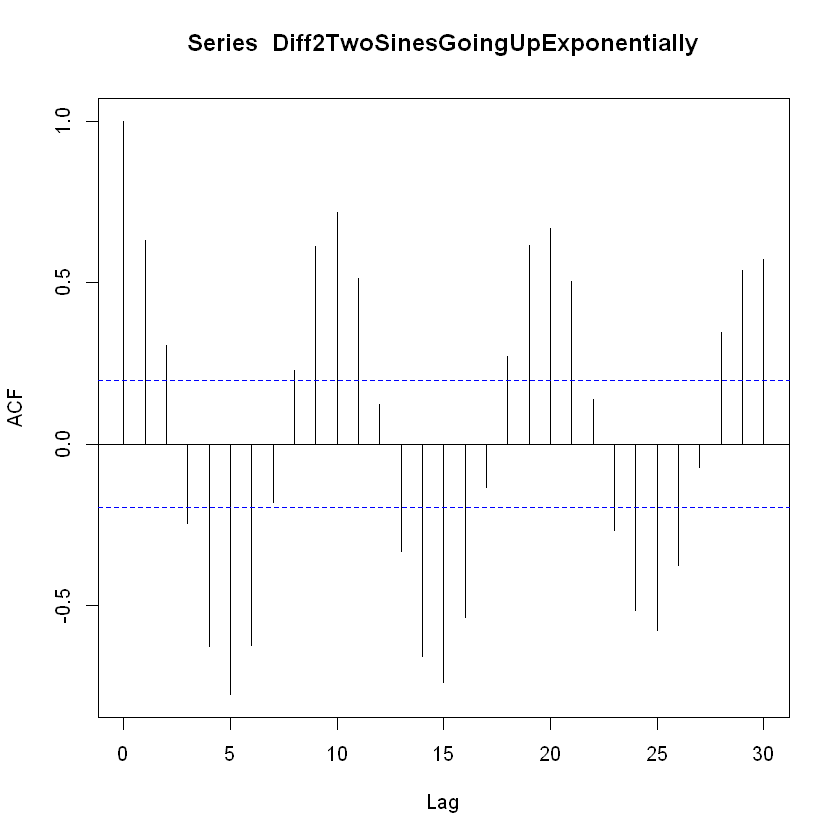

In [22]:
acf(Diff2TwoSinesGoingUpExponentially, lag.max=30)

The little dotted blue line means that the autocorrelations exceed significance bounds.

In our case, it looks like our time series data repeatedly exceeds these bounds at certain lag points. There’s a recurring pattern involved. not good!

# Let’s check the partial correlogram, too:

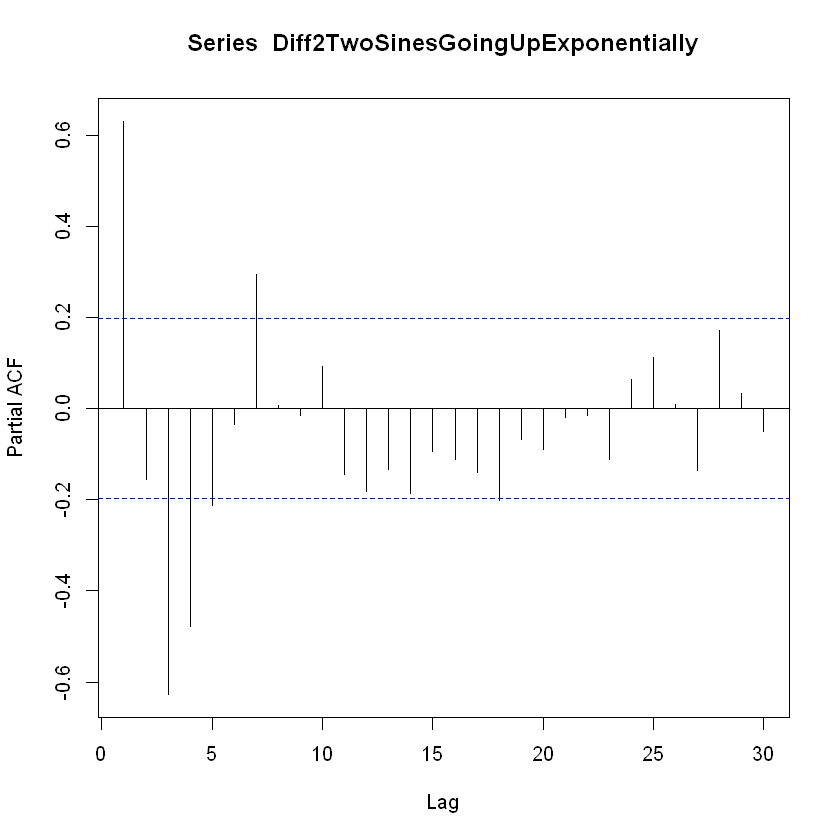

In [23]:
pacf(Diff2TwoSinesGoingUpExponentially, lag.max=30)

Again, our data seems to follow a pattern at regular lag intervals. This is a sign that our data involves some kind of seasonal component, which brings us to…

# Decomposing data

In [24]:
install.packages("TTR") #if needed
library("TTR")


Installazione pacchetto in 'C:/Users/Enric/AppData/Local/R/win-library/4.2'
(perché 'lib' non è specificato)



pacchetto 'TTR' aperto con successo con controllo somme MD5


Warning message:
"non è possibile rimuovere una precedente installazione del pacchetto 'TTR'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema durante la copia di C:\Users\Enric\AppData\Local\R\win-library\4.2\00LOCK\TTR\libs\x64\TTR.dll in C:\Users\Enric\AppData\Local\R\win-library\4.2\TTR\libs\x64\TTR.dll: Permission denied"
Warning message:
"ripristinato 'TTR'"



I pacchetti binari scaricati sono in
	C:\Users\Enric\AppData\Local\Temp\RtmpsXhULF\downloaded_packages


Warning message:
"il pacchetto 'TTR' è stato creato con R versione 4.2.3"


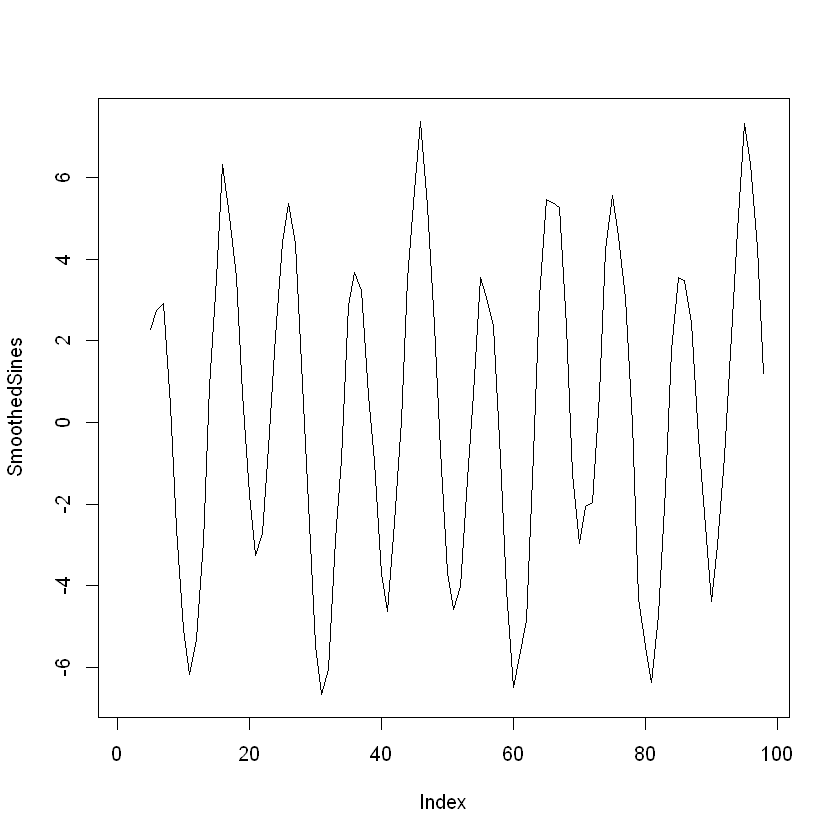

In [25]:
SmoothedSines<-SMA(Diff2TwoSinesGoingUpExponentially, n=5) #specify averaging over 5 time points
plot(SmoothedSines,type="l")

# Determining frequency using Fourier transform
A **Fourier Transform** is a way of transforming some data from the “time domain” to the “frequency domain.”

To oversimplify things: if you have a wave with frequency 5, then the Fourier-transform will consist of a “blip” at x=5, and little else. If you have some data that is made up of a wave of frequency 5 and a wave of frequency 12, then the Fourier transform will consist of a blip at x=5 and x=12, and little else.

A Fourier Transform is not exactly an easy concept to grasp at first, and a thorough explanation is outside of the scope of this exercise (we shall resume it in the next lectures). For anybody who wants an extremely accessible introduction, here is the link to a good explanation:

https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

The reason that the Fourier Transform is relevant to us is that it can show us what the frequencies of the seasonal components of our data are, so that we can account for these components when we make predictions about it.

To perform a Fourier Transform, we will need to install and load the **TSA package**:

In [26]:
install.packages("TSA") #if needed
library("TSA")

Installazione pacchetto in 'C:/Users/Enric/AppData/Local/R/win-library/4.2'
(perché 'lib' non è specificato)

si installa anche la dipendenza 'locfit'




pacchetto 'locfit' aperto con successo con controllo somme MD5
pacchetto 'TSA' aperto con successo con controllo somme MD5

I pacchetti binari scaricati sono in
	C:\Users\Enric\AppData\Local\Temp\RtmpsXhULF\downloaded_packages


Warning message:
"il pacchetto 'TSA' è stato creato con R versione 4.2.3"

Caricamento pacchetto: 'TSA'


I seguenti oggetti sono mascherati da 'package:stats':

    acf, arima


Il seguente oggetto è mascherato da 'package:utils':

    tar




We’re going to get a “periodogram” for our combined sine waves. Basically, this looks at every possible frequency and determines which ones best explain our data.

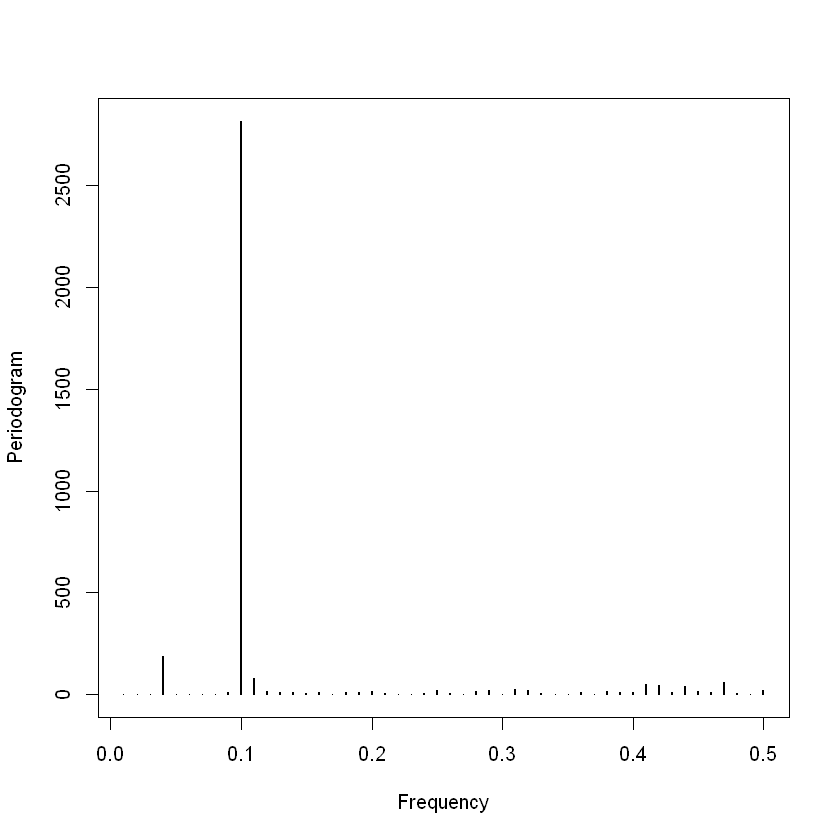

In [27]:
PGram<-periodogram(Diff2TwoSinesGoingUpExponentially)

See what it does? It basically gives us a little plot showing which frequencies seem to occur in the data.

To convert this into a useful format for our purposes, we will make a little data set from this periodogram and reshuffle it so the two highest values are on top. Then we’ll call for the values from the 1st and 2nd rows of the data set that we’ve created:

In [28]:
PGramAsDataFrame = data.frame(freq=PGram$freq, spec=PGram$spec)
order = PGramAsDataFrame[order(-PGramAsDataFrame$spec),]
top2 = head(order, 2)
top2  # display the 2 highest "power" frequencies

,freq,spec
,<dbl>,<dbl>
10,0.10,2817.7623
4,0.04,187.7125


Now we need to convert this frequency to actual time periods by taking the inverse of the frequency.

In [29]:
TimePeriod<-1/top2[2,1]
TimePeriod 

[1] 25

In [30]:
TimePeriod2<-1/top2[1,1]
TimePeriod2

[1] 10

These values – 25 and 10 – correspond exactly to the original sine waves that we put together. If you recall these plots, the first (slow) sine wave completed a cycle once every 25 time points, and the second (fast) sine wave completed its cycle once every 10 time points

In [31]:
# Decomposing data once we know the frequency
Now that we’ve determined the frequency of our data, let’s get down to actually decomposing it. 

First, we need to make it into a time series where frequency = 10 (as per the results of our Fourier Transform above)–that is to say, where 10 time periods constitute one cycle.

In [32]:
TwoSinesGoingUpExponentiallyFreq10 <- ts(Diff2TwoSinesGoingUpExponentially, frequency=10)

Now, let’s try out R’s simple “decompose” function, which uses simple moving averages.

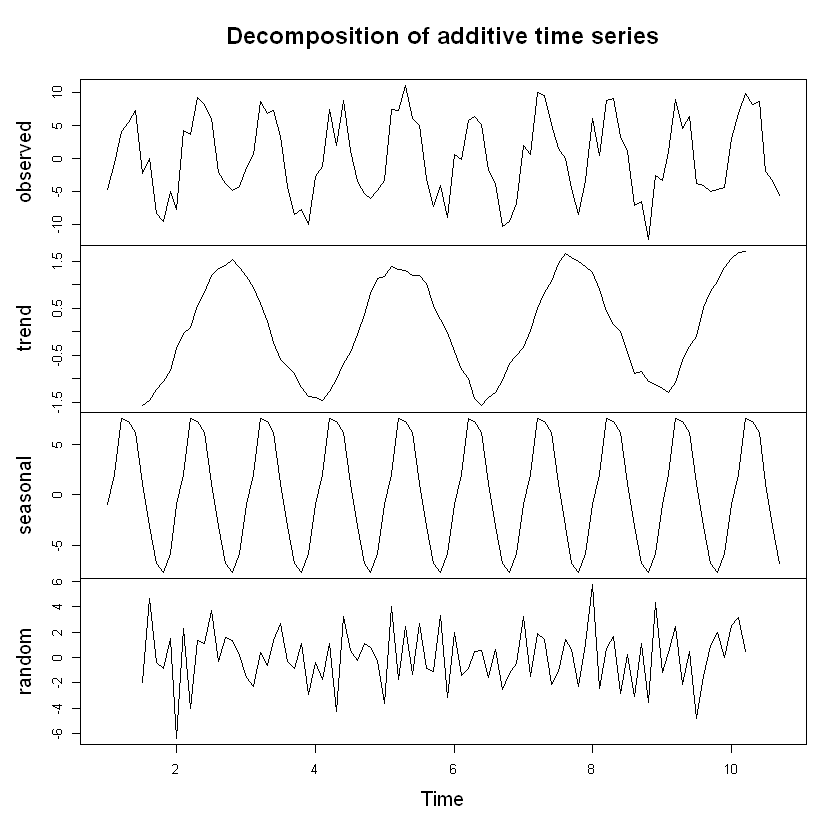

In [33]:
RDecomp<-decompose(TwoSinesGoingUpExponentiallyFreq10)
plot(RDecomp)

# LOESS method
A slightly more fine-grained method uses a Loess (“LOcal regrESSion”) model:


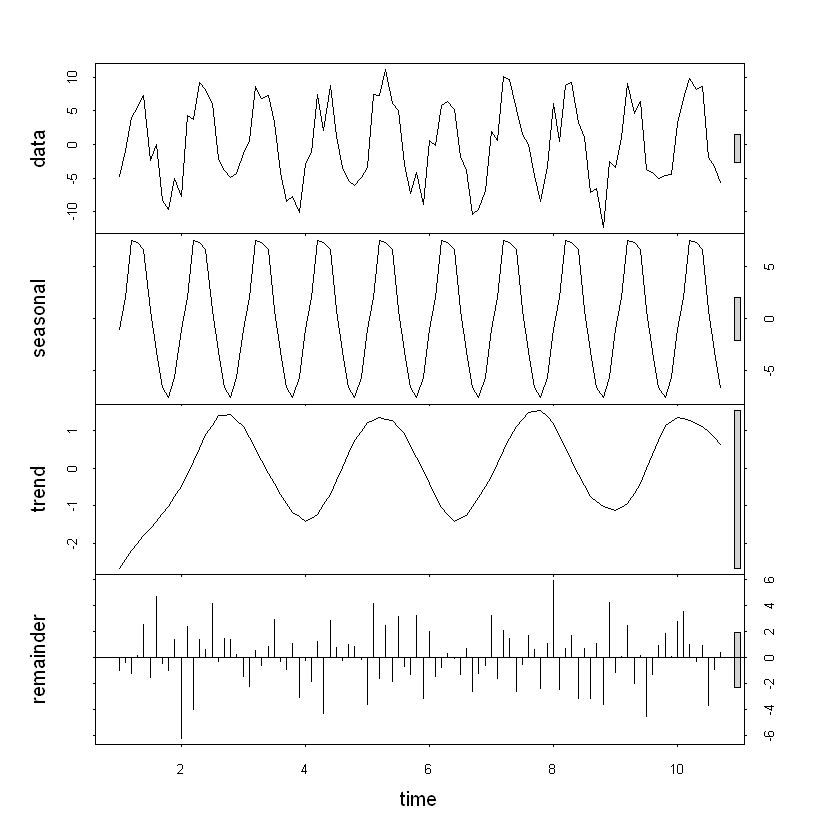

In [35]:
SineWavesDecomposed <- stl(TwoSinesGoingUpExponentiallyFreq10, s.window="periodic")
plot(SineWavesDecomposed)

Remember that we originally had two seasonal components: a higher-frequency sine wave and a lower-frequency sine wave. That’s why, after the higher-frequency component is pulled apart, the trend still looks sine-y.

The following code will actually remove that freq=10 seasonal component from the data. For this, we will need to install the forecast package:

In [36]:
#install.packages("forecast") #if needed
library('forecast')


Warning message:
"il pacchetto 'forecast' è stato creato con R versione 4.2.3"
Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



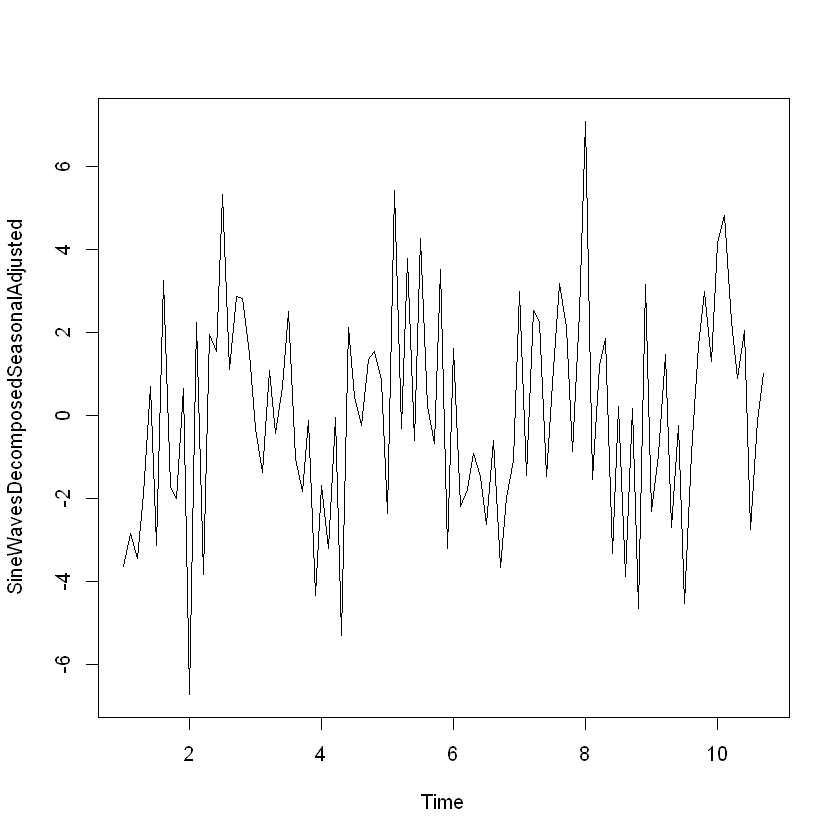

In [37]:

SineWavesDecomposedSeasonalAdjusted <- seasadj(SineWavesDecomposed)
plot(SineWavesDecomposedSeasonalAdjusted)

This new line has the high-frequency seasonal component removed. Now let’s take care of that second, lower-frequency seasonal component.

To do this, we will now assign it a frequency of 25 (which we had found using our Fourier Transform above). Again, here “frequency=25” means that 25 time points comprise one cycle.

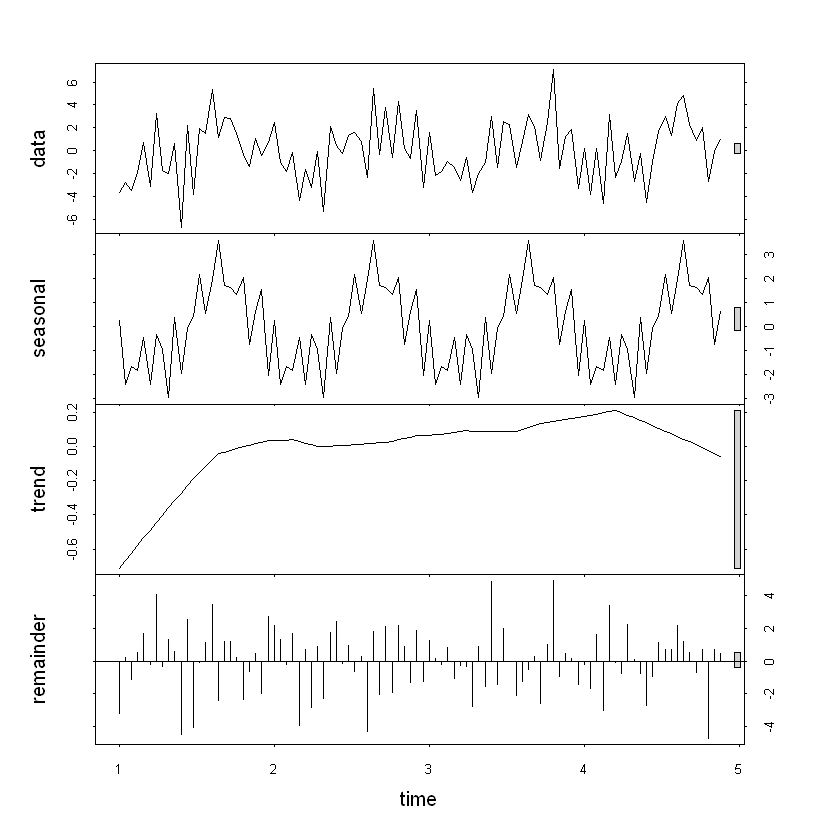

In [38]:
TwoSinesGoingUpExponentiallyFreq25 <- ts(SineWavesDecomposedSeasonalAdjusted, frequency=25)

SineWavesDecomposed2 <- stl(TwoSinesGoingUpExponentiallyFreq25, s.window="periodic")

plot(SineWavesDecomposed2)

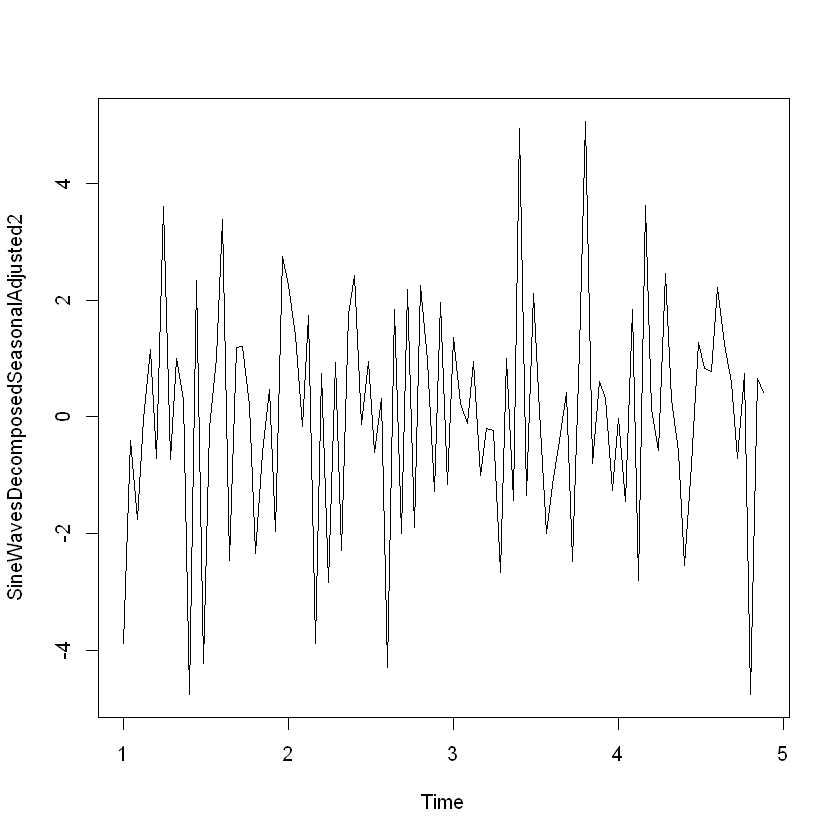

In [39]:
SineWavesDecomposedSeasonalAdjusted2 <- seasadj(SineWavesDecomposed2)
plot(SineWavesDecomposedSeasonalAdjusted2)

Now all that’s left here is the noise, with the seasonal component from the sine waves removed.

Now if we look at the autocorrelations and partial autocorrelations, we should see that our values don’t follow a pattern where they cross significance at recurring time lags as before:

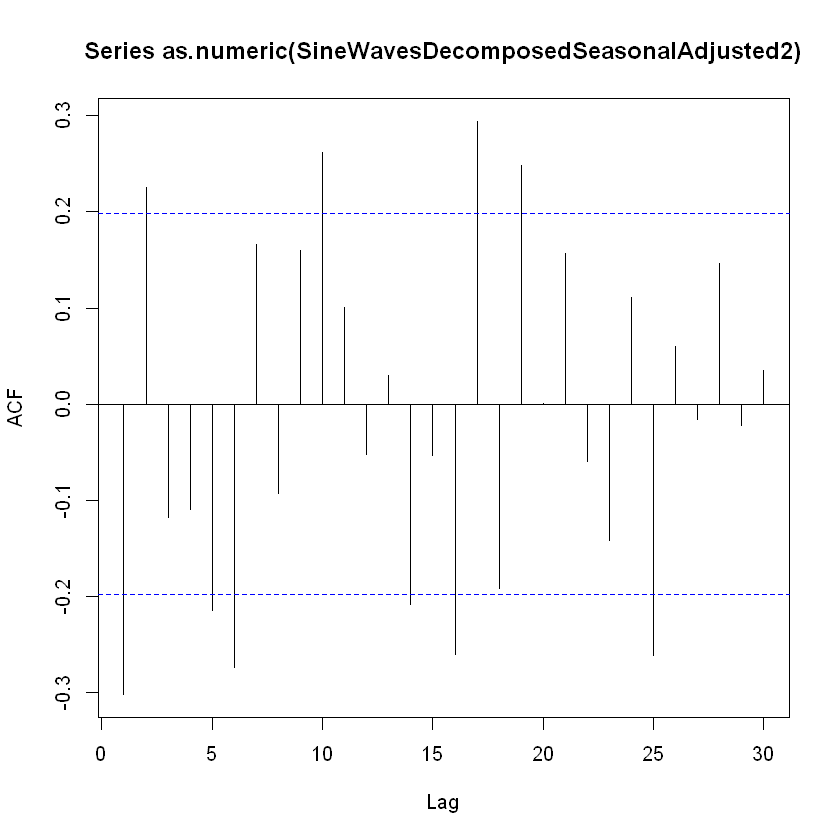

In [40]:
acf(as.numeric(SineWavesDecomposedSeasonalAdjusted2), lag.max = 30) #Because we're using a time series object, we'd have to convert it to a numeric vector instead. Otherwise the lags aren't presented as they should be.

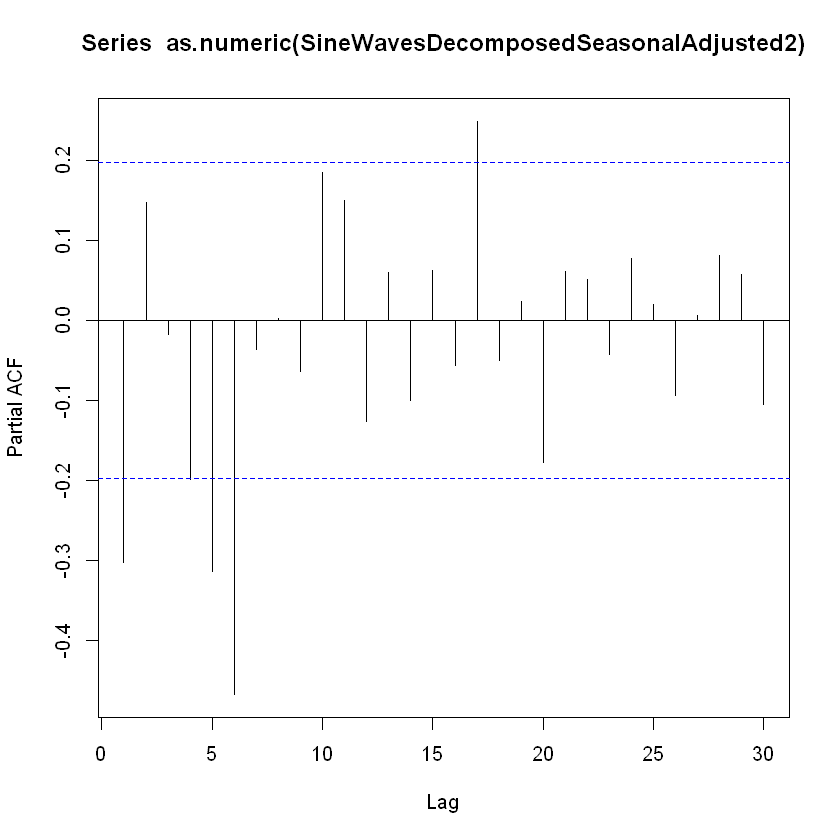

In [41]:
pacf(as.numeric(SineWavesDecomposedSeasonalAdjusted2), lag.max = 30)

So what exactly do these plots mean?

The maximum significant lag values of the correlogram gives you the possible q values for the ARMA model. For instance, if our maximum value is 3, then an ARMA(0,3) model is possible.

The maximum significant lag values of the partial correlogram gives you the p value for an ARMA model. For instance, if our maximum value is 3, then an an ARMA(3,0) model would also be possible

# The Auto-ARIMA function
The auto.arima() function can be used to find the appropriate ARIMA model in a jiffy:

In [43]:
auto.arima(TwoSinesGoingUpExponentially)

Series: TwoSinesGoingUpExponentially 
ARIMA(2,1,5) with drift 

Coefficients:
         ar1      ar2      ma1     ma2     ma3     ma4     ma5   drift
      1.5894  -0.9599  -0.7602  0.8890  0.1727  0.0447  0.3596  2.2027
s.e.  0.0287   0.0276   0.1130  0.1216  0.1392  0.1375  0.0985  1.0999

sigma^2 = 6.261:  log likelihood = -231.75
AIC=481.5   AICc=483.52   BIC=504.85

The output tells us that the model that best fits our original data is ARIMA(2,1,5).

What does this mean?

2 tells us that we need to take into account the Y value at 2 lags from a given time point *t*.

1 tells us that the time series is not stationary, so we need to take a first-order difference.

5 tells us that this model takes into account the error term from 5 preceding/lagged values.

On a more general note, the principle of parsimony would say that you’d want to choose the model with the fewest parameters/specifications However, note that different criteria can be used to select a model (see auto.arima() help page). 

For instance, the “bic” criterion penalises the number of parameters involved.

# Forecasting with ARIMA
OK, now to the good part: we can use ARIMA to forecast future time points in a series.

For this, you’d need to first specify an ARIMA model, with a three-number vector corresponding to the p, d, and q values of your model.

[Note that we’ll have to specify that we want the arima function from the stats package, and not the arima function from the TSA package. To do this, we’d write “stats::arima( …” rather than just “arima(…” ]

In [46]:
TwoSinesAsArima<-stats::arima(SineWavesDecomposedSeasonalAdjusted, order=c(2,1,5))
SineWaveForecasts <- forecast(TwoSinesAsArima, h=3)
SineWaveForecasts

      Point Forecast     Lo 80     Hi 80     Lo 95    Hi 95
10.80     -1.8926850 -4.666228 0.8808583 -6.134453 2.349083
10.90      1.1180806 -1.656260 3.8924213 -3.124907 5.361069
11.00      0.1699921 -2.900124 3.2401083 -4.525345 4.865330

Then you can use the forecast.Arima function in the “forecast” package to make predictions for the next X items in the time series

By default, R will spit out the 80% and 95% prediction intervals. However, you can also specify a level of confidence as follows…

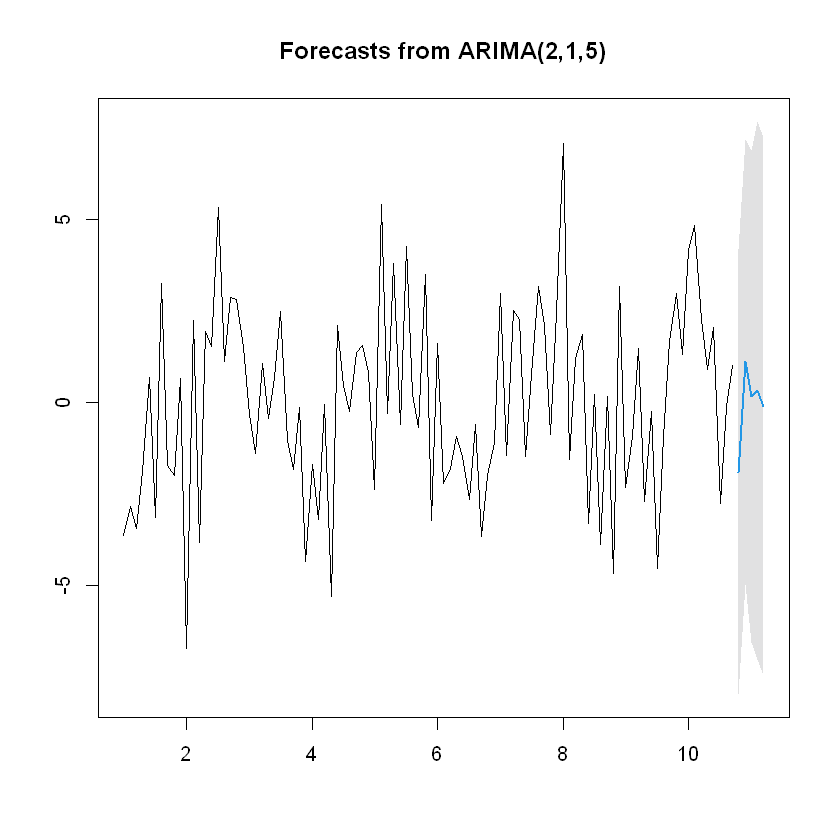

In [50]:
SineWaveForecasts <- forecast(TwoSinesAsArima, h=5, level=c(99.5))
plot(SineWaveForecasts)

# Testing the distribution of errors in your ARIMA model.
## Are successive errors correlated?
Ideally, successive forecast errors should NOT be correlated. We can test this in the following ways…

We can use “$residuals” on our forecast object to call up these errors, and pull up an autocorrelation plot for these as follows:

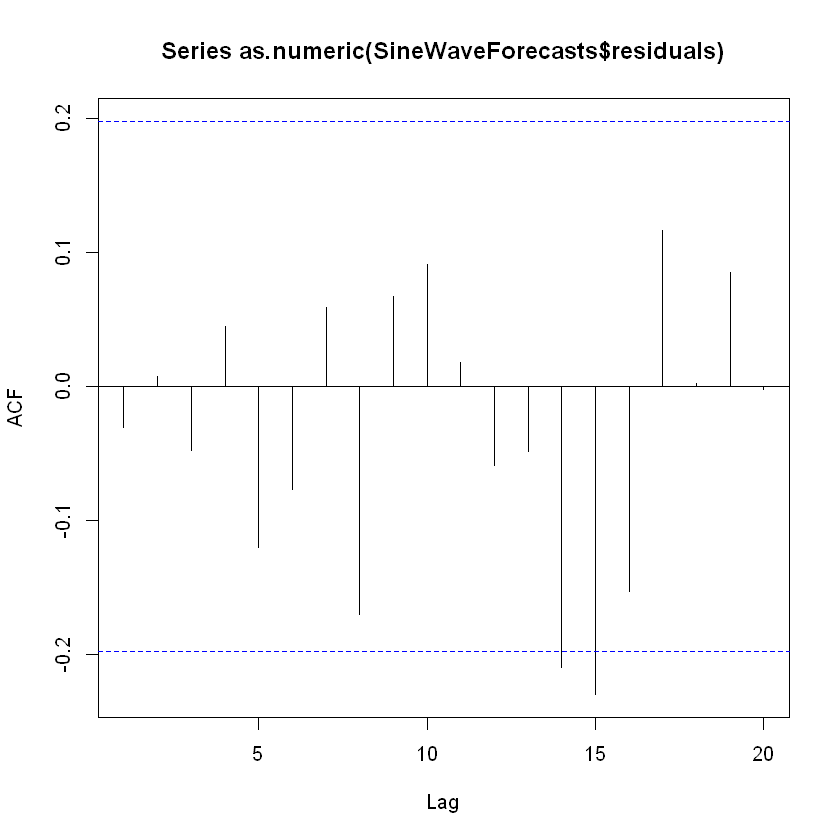

In [51]:
acf(as.numeric(SineWaveForecasts$residuals), lag.max=20)

If any of the lagged autocorrelations are significant (read: if they cross the blue dotted line), then we have a significant correlation. Ideally, this wouldn’t be the case!

This can also be tested formally with a Ljung-Box test, as follows:

In [52]:
Box.test(SineWaveForecasts$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  SineWaveForecasts$residuals
X-squared = 25.044, df = 20, p-value = 0.1998


Here, p is greater than .05, suggesting that there are NO significant autocorrelations between successive forecasting errors

# Do the errors follow a normal distribution?
To determine whether the errors in our ARIMA forecast are normally distributed with a mean of 0 and constant variance, we can also visualize our forecast errors with a time plot.

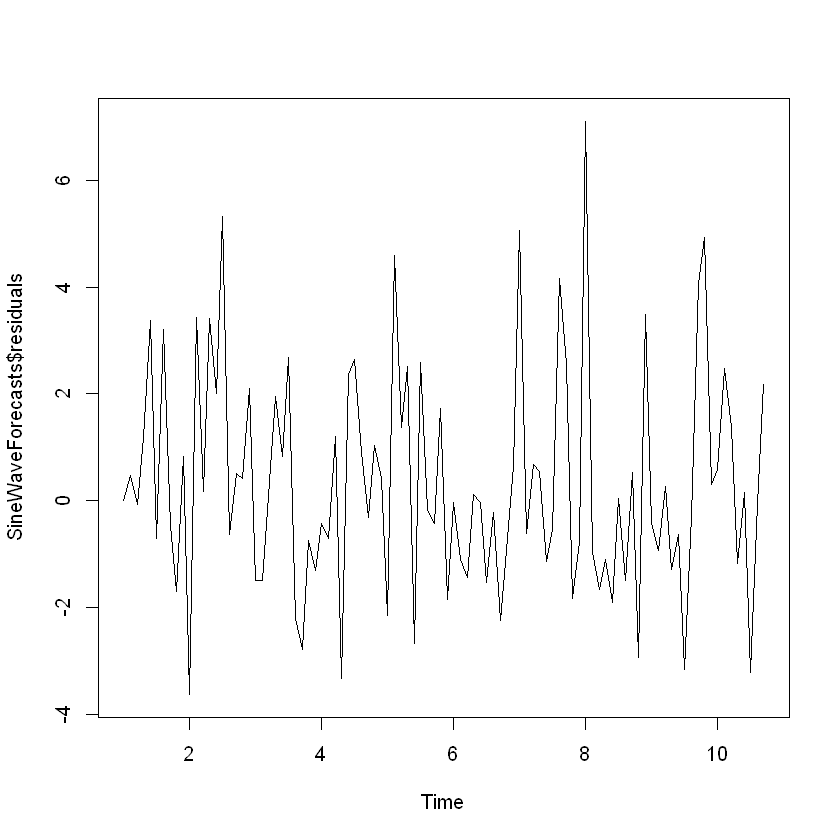

In [53]:
plot.ts(SineWaveForecasts$residuals)

his time plot should show that our forecast errors have generally equal variance over time, and that their mean is around zero.

Of course, we can directly calculate the mean rather than trying to eyeball it from the plot:

In [54]:
mean(SineWaveForecasts$residuals)

[1] 0.3226414

Our mean is close to zero – a good sign!